## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

# calculating 3 key metrics in the following
1. Find the six month rolling average (a.k.a. simple moving average) for each date and browser in the dataset.
2. Find percentage change from the previous quarter for each date and browser,include dates during or after 2009.
3. Comparing Chrome's annual Google Trends performance in 2009, 2012, 2015, and 2018 

In [20]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#load the dataset
df = pd.read_csv("datasets/worldwide_browser_trends.csv", parse_dates=['Month'], index_col='Month')

In [22]:
#check the size of data
df.shape

(202, 5)

In [23]:
# any missing values
df.isnull().sum()

Firefox              0
Safari               0
Google Chrome        0
Internet Explorer    0
Opera                0
dtype: int64

In [24]:
#look at the first 5 row of datasets
df.head()

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,12,2,2,37,9
2004-02-01,20,2,2,39,9
2004-03-01,18,2,2,34,8
2004-04-01,20,2,2,33,9
2004-05-01,20,2,2,35,9


# Finding six month rolling average

Text(0, 0.5, 'Popularity')

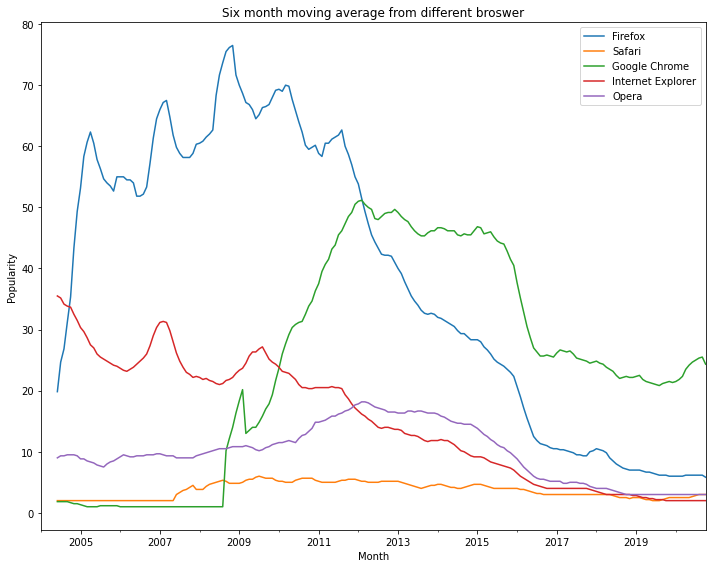

In [25]:
#get 6-month rolling average
rolling_six  = df.rolling(6).mean() 

#visualize the dataframe trend
rolling_six.plot(figsize=(10,8), title="Six month moving average from different broswer")
plt.ylabel("Popularity")
#plt.show()

# Finding percentage change from the previous quarter since since 2009

Text(0.5, 1.0, 'Percentage of quaterly difference')

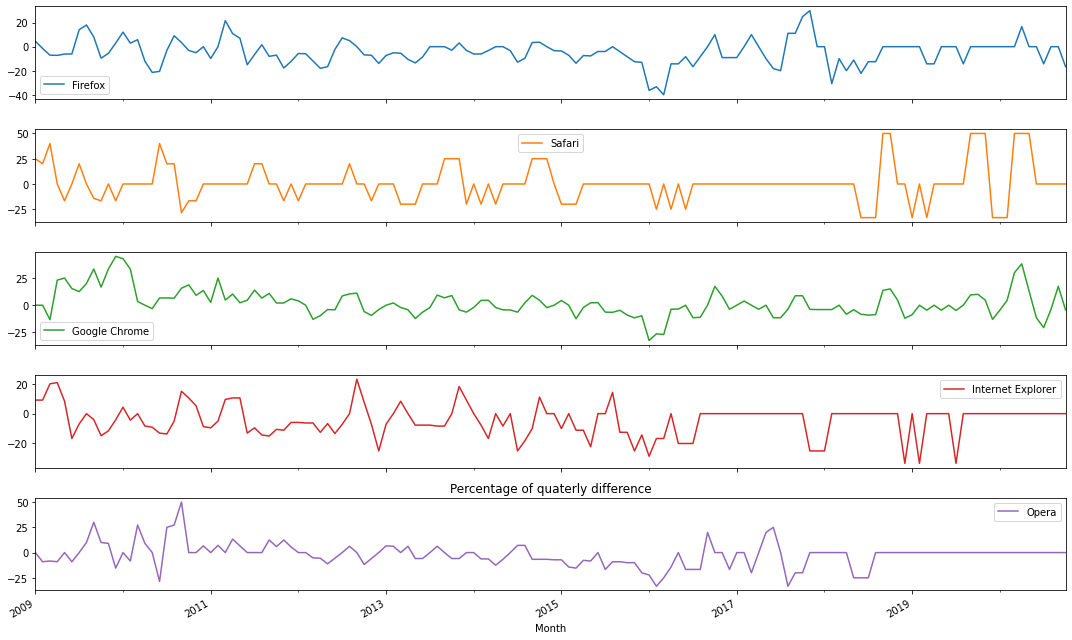

In [26]:
# get 4-month rolling average since 2008 by finding row difference with window 1
pct_change_quarterly = df.pct_change(3)['2009':]*100
#visualize the dataframe trend
pct_change_quarterly.plot(figsize=(15,9),subplots=True)
plt.title("Percentage of quaterly difference")

# Google yearly trends on 2009, 2012, 2015 and 2018

In [27]:
def interested_browser(year, name, df):
    """
    This function return the plot of interested browswer
    Arguments: year, string ,from 2008 - 2020
               name, string, name of browser
               df, dataframe
    """
    # append the relevant dataset into a list by resetting the index
    df_list=[df[i][name].reset_index(drop=True) for i in year]
    final_df = pd.DataFrame(df_list)
    # transpose, swithc column to row
    final_df = final_df.T
    #reset column name
    final_df.columns = year
    return final_df
    

In [28]:
year = ['2009', '2012', '2015', '2018']
name = 'Google Chrome'
chrome_trends= interested_browser(year, name, df)

<AxesSubplot:title={'center':'Chrome Search Performance in 2009, 2012, 2015 & 2018'}>

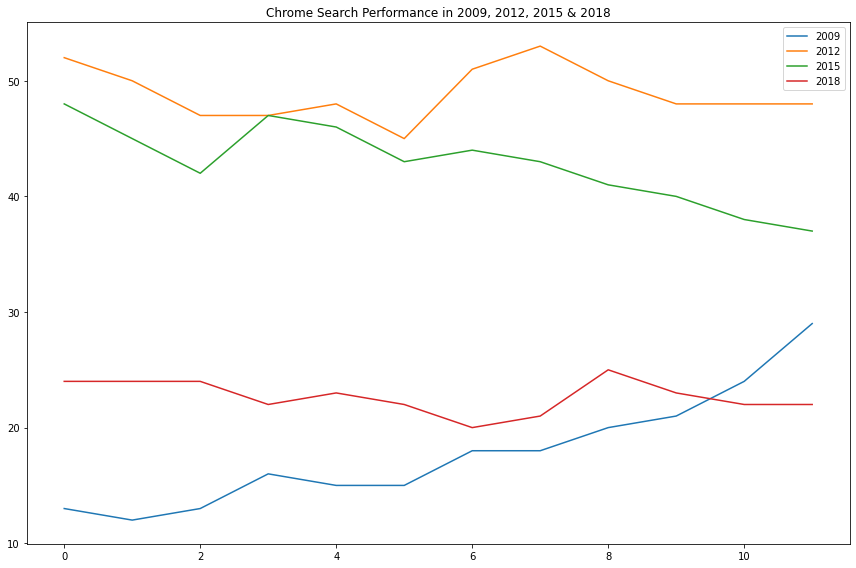

In [29]:
chrome_trends.plot(title="Chrome Search Performance in 2009, 2012, 2015 & 2018", figsize=(12,8))